In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')

In [19]:
data.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2636,1392673,Spacious Factory Converted Loft,7503643,Vida,Brooklyn,Greenpoint,40.72756,-73.9423,Entire home/apt,129,30,6,02-09-2018,0.09,52,249
14319,11146432,Cozy top floor room at Brooklyn&Breakfast,344035,Brooklyn& Breakfast -Len-,Brooklyn,Prospect Heights,40.67963,-73.97054,Private room,50,1,257,01-07-2019,6.23,13,286
33789,26777561,Simple + Cute + Spacious Studio (perfect for 1-2),201350300,Yeena,Manhattan,Upper West Side,40.7862,-73.98089,Entire home/apt,119,3,6,23-06-2019,0.57,1,0
30496,23606468,NEW-BRIGHT-SPACIOUS-LES-W/D-2BATH-BY TRAIN-ROO...,335046,Orit,Manhattan,Lower East Side,40.71374,-73.98907,Private room,100,3,10,01-06-2019,0.62,3,361
22861,18508959,Lovely 2 bdr apartment Williamsburg w private ...,18280205,Anthony,Brooklyn,Williamsburg,40.71463,-73.95501,Entire home/apt,200,2,32,16-06-2019,1.25,1,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [6]:
# We do not need ID, HOST_ID, LATITUDE, LONGITUDE as INT64. So we should cast them as strings

In [9]:
data['id'] = data['id'].astype(str)
data['host_id'] = data['host_id'].astype(str)
data['latitude'] = data['latitude'].astype(str)
data['longitude'] = data['longitude'].astype(str)

In [10]:
# now we can see all the numerical data using describe function

In [11]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48906.000000,48906.000000,48906.000000,38854.000000,48906.000000,48906.000000
mean,152.711324,7.031612,23.300454,1.373151,7.142702,112.782031
std,240.128713,20.512489,44.607175,1.680270,32.948926,131.620370
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# How does the categorical data look like?

In [12]:
data.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [14]:
data.duplicated().sum() # how many duplicates are there?

11

In [15]:
# Remove the duplicates so that the analysis is correct

data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum() # check that the duplicates are removed

0

In [18]:
# want to check all the column headings
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [27]:
data['room_type'].unique() # how many different types of 'room_type' are there, as an array

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
data['room_type'].value_counts() # Now count the frequency of all the types of 'room_type'

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [31]:
data['room_type'].value_counts(normalize = True)

room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64

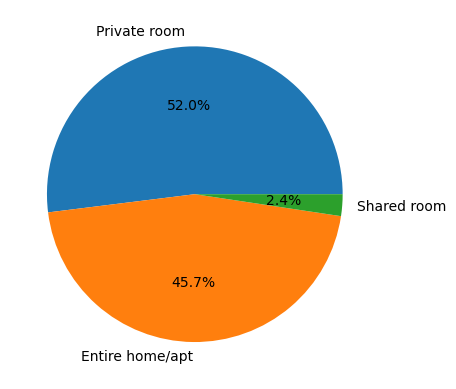

In [44]:
plt.pie(data['room_type'].value_counts(), autopct = '%1.1f%%', labels = data['room_type'].unique())
plt.show()